In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from scipy.stats import qmc
from scipy.spatial import Delaunay
import matplotlib.tri as tri

#Aux functions for generate samples
def move_point(max_number, xPoint , yPoint, tolerance):
    r =  np.random.uniform(0, 1)
    n = max_number
    if r > 0.5:
        if xPoint >= max_number*(1.0-tolerance): 
            xPoint = n
        if yPoint >= max_number*(1.0-tolerance): 
            yPoint = n
        if xPoint <= max_number*tolerance: 
            xPoint = 0
        if yPoint <= max_number*tolerance: 
            yPoint = 0
    else:
        if xPoint <= max_number*tolerance: 
            xPoint = 0            
        if yPoint <= max_number*tolerance: 
            yPoint = 0
        if xPoint >= max_number*(1.0-tolerance): 
            xPoint = n
        if yPoint >= max_number*(1.0-tolerance): 
            yPoint = n
    #print("returning", xPoint, yPoint)
    return (xPoint, yPoint)

def add_box(arr, tolerance):
    box = [[0, 0], [1, 1], [0, 1], [1, 0]]
    arr = np.append(arr, box, axis=0)
    maxNumber = max(max(arr[:,0]), max(arr[:,1]))
    for i in range(0, len(arr)):
        new_p = move_point(1, arr[i,0], arr[i,1], tolerance)
        arr[i,0] = new_p[0]
        arr[i,1] = new_p[1]
    np.unique(arr, axis=0)
    return arr

np.random.seed(545)
rng = 4554


# Mesh samples generation

Elegir la cantidad de vértices que deben tener las mallas 

In [13]:
import math


# 500
radius = 0.035 #Poisson
numVertices = 500 #Random points
PointsperLine = 23 # Uniform
str_areaMax = "0.00169" #Semiuniform
tolerance = 0.02 # max distance from the boundary


## 1500 vértices
#tolerance = 0.02 # max distance from the boundary
#radius = 0.02 #Poisson
#numVertices = 1500 #Random points
#PointsperLine = 39 # Uniform
#str_areaMax = "0.000522" #Semiuniform

# 2500 vértices
#tolerance = 0.01 # max distance from the boundary
#radius = 0.0154 #Poisson
#numVertices = 2500 #Random points
#PointsperLine = 50 # Uniform
#str_areaMax = "0.00032" #Semiuniform

# 5000 vértices
#numVertices = 5000 #Random points
#PointsperLine = 71 # Uniform
#radius = 0.011 #Poisson
#str_areaMax = '0.000159'


# 10000 vértices
#numVertices = 10000 #Random points
#tolerance = 1/10**(0.5*math.log10(numVertices) + 0.5) # max distance from the boundary
#radius = 0.00775 #Poisson
#PointsperLine = 100 # Uniform
#str_areaMax = '0.000079'

# 20000 vértices
#tolerance = 0.001 # max distance from the boundary
#radius = 0.005469 #Poisson
#numVertices = 20000 #Random points
#PointsperLine = 142 # Uniform
#str_areaMax = '0.0000394'

# Probar con 10**2, 10**4, 10**6, 10**8

tolerance = 1/10**(0.5*math.log10(numVertices) + 0.5) # max distance from the boundary


# Generación de Poisson triangulation


Number of points:  512


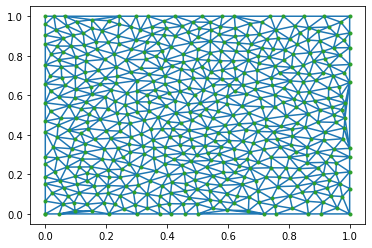

In [20]:

engine = qmc.PoissonDisk(d=2, radius = radius, seed=rng)
sample = engine.fill_space()

sample = add_box(sample, tolerance)

print("Number of points: ", len(sample))

poissonTriangulation = Delaunay(sample)
plt.triplot(sample[:,0], sample[:,1], poissonTriangulation.simplices.copy())
plt.plot(sample[:,0], sample[:,1], '.')
plt.show()


poissonPoints = sample
poissonTriangles = poissonTriangulation.simplices.copy()

Mover puntos cercanos al borde, al borde

# Generación de random triangulation

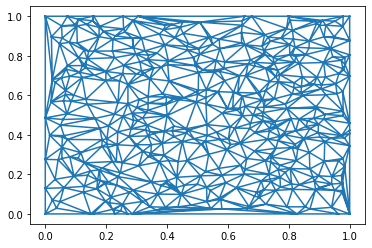

Number of points:  502


In [15]:


RandomSample = np.random.rand(numVertices - 2,2)
RandomSample = add_box(RandomSample, tolerance)

randomDelaunay = Delaunay(RandomSample)
plt.triplot(RandomSample[:,0], RandomSample[:,1], randomDelaunay.simplices.copy())
plt.show()
print("Number of points: ", len(RandomSample))

randomPoints = RandomSample
randomTriangles = randomDelaunay.simplices.copy()


# Generate uniform grid

529


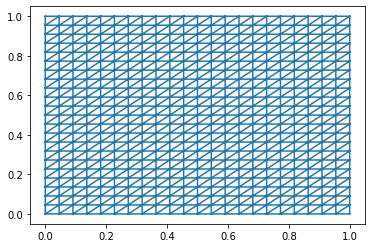

In [16]:
import math

size = PointsperLine*PointsperLine
sqrt_n = PointsperLine

UniformTriangles = []

UniformPoints = []


estimado = 2 * (size - sqrt_n)

for i in range(sqrt_n):
    for j in range(sqrt_n):
        #v_coord_x.append(i)
        #v_coord_y.append(j)
        #UniformPoints.append([i, j])
        UniformPoints.append([i / (sqrt_n - 1), j / (sqrt_n - 1)])

        

for i in range(size - sqrt_n):
    if i % sqrt_n != sqrt_n - 1:
        UniformTriangles.append([i, i + 1, i + sqrt_n + 1])
        UniformTriangles.append([i, i + sqrt_n + 1, i + sqrt_n])

print(len(UniformPoints))

UniformPoints = np.array(UniformPoints)
plt.triplot(UniformPoints[:,0], UniformPoints[:,1], UniformTriangles)


# semiuniform mesh

Number of points:  503


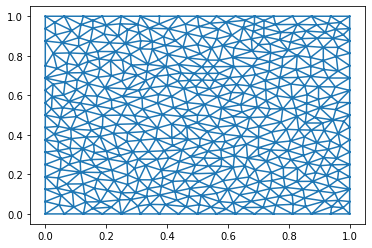

In [21]:
import triangle

#areaMax = float(0.00032)

#str_areaMax = '0.0000394'

t = triangle.triangulate({'vertices': [[0,1],[1,1],[1,0],[0,0]], 'segments': [[0,1],[1,2],[2,3],[3,0]]}, 'qa' + str_areaMax)
ver = t['vertices'].tolist()
simplex = t['triangles'].tolist()

ver = np.array(ver)

plt.triplot(ver[:,0], ver[:,1], simplex)

print("Number of points: ", len(ver))



semiUniformPoints = ver
semiUniformTriangles = simplex

# Generacion del .off

In [18]:
#Num of vertices and simplices
print(len(sample), len(poissonTriangulation.simplices))
print(len(ver), len(simplex))
print(len(UniformPoints), len(UniformTriangles))
print(len(RandomSample), len(randomDelaunay.simplices))

import meshio

#folder = 'polyllaMeshes' + '/'
folder = ''

#writte .OFF files
#meshio.write_points_cells(folder + str(numVertices) + "poisson.off", poissonPoints, [("triangle", poissonTriangles)])
#meshio.write_points_cells(folder + str(numVertices) + "random.off", randomPoints, [("triangle", randomTriangles)])
#meshio.write_points_cells(folder + str(numVertices) + "uniform.off", UniformPoints, [("triangle", UniformTriangles)])
#meshio.write_points_cells(folder + str(numVertices) + "semiUniform.off", semiUniformPoints, [("triangle", semiUniformTriangles)])



512 971
503 941
529 968
502 972


Warning: OFF requires 3D points, but 2D points given. Appending 0 as third component.

Warning: OFF requires 3D points, but 2D points given. Appending 0 as third component.

Warning: OFF requires 3D points, but 2D points given. Appending 0 as third component.

Warning: OFF requires 3D points, but 2D points given. Appending 0 as third component.

# Call polylla

In [19]:
#import os
#
#os.system("./Polylla" + " " + str(numVertices) + "poisson.off " +  str(numVertices) + "poisson.polylla")
#os.system("./Polylla" + " " + str(numVertices) + "random.off " +  str(numVertices) + "random.polylla")
#os.system("./Polylla" + " " + str(numVertices) + "uniform.off " +  str(numVertices) + "uniform.polylla")
#os.system("./Polylla" + " " + str(numVertices) + "semiUniform.off " +  str(numVertices) + "semiUniform.polylla")

#print("polyllaMeshes\Polylla.exe " + folder + str(numVertices) + "poisson.off " + folder + str(numVertices) + "poisson.polylla")
